In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# Paramaters for query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = api_key

# Build partial query URL - without city
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
city_count = []

# set up a counter to print out
counter = 0

# print the start of the API call
print("Beginning Data Retrieval")

# Loop through the list of cities and retrieve data on cloudiness, country, 
# date, humidity, lat, lng , Max Temperature, and Wind Speed
for city in cities:
    try:
        counter += 1
        print(f"processing record {counter} | {city}")
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        city_count.append(response['name'])
    except Exception as e:
        print("error type: {}. error value: {}".format(type(e), e))

Beginning Data Retrieval
processing record 1 | dikson
processing record 2 | ushuaia
processing record 3 | bluff
processing record 4 | lasa
processing record 5 | bredasdorp
processing record 6 | moree
processing record 7 | punta arenas
processing record 8 | guerrero
processing record 9 | deqing
processing record 10 | suez
processing record 11 | sabang
processing record 12 | mar del plata
processing record 13 | samalaeulu
error type: <class 'KeyError'>. error value: 'clouds'
processing record 14 | victoria
processing record 15 | asfi
error type: <class 'KeyError'>. error value: 'clouds'
processing record 16 | busselton
processing record 17 | rikitea
processing record 18 | maple creek
processing record 19 | necochea
processing record 20 | oussouye
processing record 21 | grindavik
processing record 22 | sabaudia
processing record 23 | nikolskoye
processing record 24 | new norfolk
processing record 25 | gat
processing record 26 | beziers
processing record 27 | tessalit
processing record 28 

processing record 214 | batemans bay
processing record 215 | bambous virieux
processing record 216 | cayambe
processing record 217 | kishi
processing record 218 | nome
processing record 219 | les herbiers
processing record 220 | kruisfontein
processing record 221 | ostrovnoy
processing record 222 | comodoro rivadavia
processing record 223 | half moon bay
processing record 224 | galesong
processing record 225 | lompoc
processing record 226 | mana
processing record 227 | coahuayana
processing record 228 | severo-kurilsk
processing record 229 | port hedland
processing record 230 | manuk mangkaw
processing record 231 | belushya guba
error type: <class 'KeyError'>. error value: 'clouds'
processing record 232 | farah
processing record 233 | mount isa
processing record 234 | suntar
processing record 235 | zhigansk
processing record 236 | patrocinio
processing record 237 | sicuani
processing record 238 | qingdao
processing record 239 | guaruja
processing record 240 | valparaiso
processing reco

error type: <class 'KeyError'>. error value: 'clouds'
processing record 426 | sao gabriel da cachoeira
processing record 427 | nelson bay
processing record 428 | nguiu
error type: <class 'KeyError'>. error value: 'clouds'
processing record 429 | wageningen
processing record 430 | la asuncion
processing record 431 | ormond beach
processing record 432 | tucupita
processing record 433 | hovd
processing record 434 | ndioum
processing record 435 | padang
processing record 436 | norman wells
processing record 437 | domat
processing record 438 | watertown
processing record 439 | san fernando
processing record 440 | grand gaube
processing record 441 | saint george
processing record 442 | port-gentil
processing record 443 | dayong
processing record 444 | manicore
processing record 445 | nokaneng
processing record 446 | souillac
processing record 447 | coquimbo
processing record 448 | zhezkazgan
processing record 449 | arfara
processing record 450 | havoysund
processing record 451 | sabha
proces

In [16]:
# create a dictionary from the output lists above
city_dict = {
    'City':city_count, 
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':maxTemp,
    'Wind Speed':windSpeed
}
city_dict

{'City': ['Dikson',
  'Ushuaia',
  'Bluff',
  'Lasa',
  'Bredasdorp',
  'Moree',
  'Punta Arenas',
  'Guerrero',
  'Deqing',
  'Suez',
  'Sabang',
  'Mar del Plata',
  'Victoria',
  'Busselton',
  'Rikitea',
  'Maple Creek',
  'Necochea',
  'Oussouye',
  'Grindavik',
  'Sabaudia',
  'Nikolskoye',
  'New Norfolk',
  'Gat',
  'Beziers',
  'Tessalit',
  'Kapaa',
  'Pato-o',
  'Barrow',
  'Hobart',
  'Inhambane',
  'Atuona',
  'Mahebourg',
  'East London',
  'Chokurdakh',
  'Carnarvon',
  'Boyolangu',
  'Staraya Toropa',
  'Jamestown',
  'Port Alfred',
  'Tuktoyaktuk',
  'Broome',
  'Maloy',
  'Great Yarmouth',
  'Sabinas Hidalgo',
  'Rajnagar',
  'Arlit',
  'Ikwiriri',
  'Upernavik',
  'Hilo',
  'Diapaga',
  'Butaritari',
  'Esperance',
  'Daru',
  'Tiksi',
  'Qaanaaq',
  'Kodiak',
  'Tautira',
  'Cape Town',
  'Avarua',
  'Kamaishi',
  'Santa Maria',
  'San Vicente',
  'Anzio',
  'Vila Franca do Campo',
  'Auburn',
  'Lixourion',
  'Noumea',
  'Hofn',
  'Tasiilaq',
  'Bambanglipuro',
  '

In [18]:
# create a dataframe from the dictionary I created
city_df = pd.DataFrame(city_dict)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Dikson,48,RU,1551411635,89,73.51,80.55,3.35,20.85
1,Ushuaia,90,AR,1551405600,100,-54.81,-68.31,42.80,11.41
2,Bluff,76,AU,1551411588,37,-23.58,149.07,85.66,14.03
3,Lasa,20,CY,1551409200,100,34.92,32.53,41.00,4.70
4,Bredasdorp,64,ZA,1551411173,82,-34.53,20.04,68.00,6.93


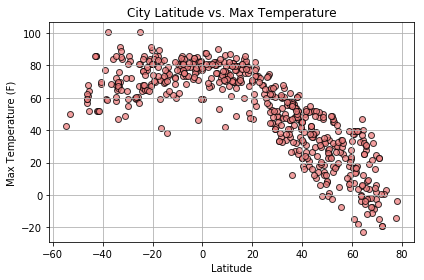

In [22]:
# Scatter plot for Latitude vs. Temperature Plot
plt.scatter(city_df['Latitude'], 
            city_df['Max Temp'], 
            # s = urban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "lightcoral", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# format the chart and print it out
plt.tight_layout()
plt.show()

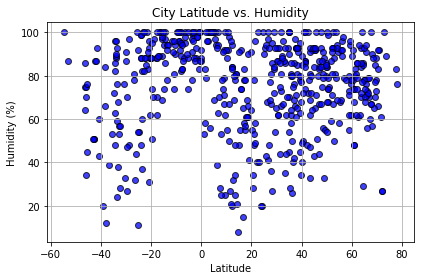

In [23]:
# Scatter plot for City Latitude vs Humidity
plt.scatter(city_df['Latitude'], 
            city_df['Humidity'], 
            # s = urban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# format the chart and print it out
plt.tight_layout()
plt.show()

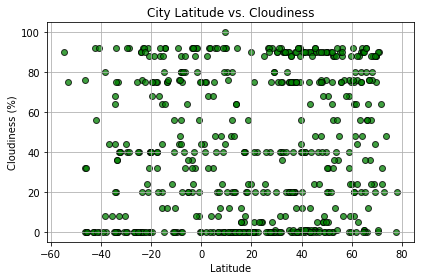

In [27]:
# Scatter plot for City Latitude vs Cloudiness
plt.scatter(city_df['Latitude'], 
            city_df['Cloudiness'], 
            # s = urban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "green", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# format the chart and print it out
plt.tight_layout()
plt.show()

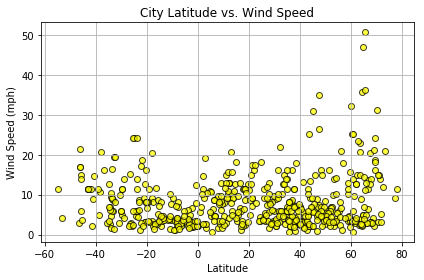

In [28]:
# Scatter plot for City Latitude vs Wind Speed
plt.scatter(city_df['Latitude'], 
            city_df['Wind Speed'], 
            # s = urban_df.groupby("city")["driver_count"].max() * 10,
            facecolor = "yellow", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# format the chart and print it out
plt.tight_layout()
plt.show()

### Analysis
* Max Temperature is much higher at the equator (0 degrees latitude). Also, cities in the southern hemisphere seem to be much higher in general than cities in the northern hemisphere.
* There is no strong relationship between humidity and latitude as many cities below, at, or above the equator have an equal amount. 
* There is no strong relationship between Wind Speed and Latitude. However, there seem to be more cities in the northern hemisphere that have more than 20 MPH Wind Speed.
* Also, there is no relationship between cloudiness and Latitude as well. However, Most cities seem to have a high amount or low amount of overall cloudiness.